In [77]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Mercedes-Benz Greener Manufacturing
* The first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include, for example, the passenger safety cell with crumple zone, the airbag and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium car makers. Daimler’s Mercedes-Benz cars are leaders in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams. .

* To ensure the safety and reliability of each and every unique car configuration before they hit the road, Daimler’s engineers have developed a robust testing system. But, optimizing the speed of their testing system for so many possible feature combinations is complex and time-consuming without a powerful algorithmic approach. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Daimler’s production lines.

* If car take more time during testing it will effect on price of the car because Daimler’s is spending there electricity, man-power,warehouse cost and other material. So more the test time more will be the cost of car.

* Other problem Co2 emmision will also increase.

## About Data
1. Dataset contains an anonymized set of variables, each representing a custom feature in a Mercedes car. For example, a variable could be 4WD, added air suspension, or a head-up display.
2. There is 8 catagorial feature, 1 ID feature, 368 are binary feature, and y column which is time in sec.
  

## Performance metrics
1. R^2 (Coefficient of determination)

## Business Constraints
1. There no constraint related to test time prediction but still predicting queries should not take must seconds because if it take 40–60 sec to predict then it has no use

## Data Collection
1. Kaggle provides a ZIP file which contain Train.csv, Test.csv and Submission.csv https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/data

### Loading data

In [0]:
from zipfile import ZipFile
file_name='/content/drive/My Drive/case/mercedes-benz-greener-manufacturing.zip'
with ZipFile(file_name,'r') as Zip:
  Zip.extractall()

In [0]:
file_name='train.csv.zip'
with ZipFile(file_name,'r') as Zip:
  Zip.extractall()

In [0]:
file_name='test.csv.zip'
with ZipFile(file_name,'r') as Zip:
  Zip.extractall()  

In [0]:
import pandas as pd
import numpy as np

## Importing train data

In [82]:
train_data=pd.read_csv('train.csv')
print('Train data shape : ',train_data.shape)
train_data.head(2)

Train data shape :  (4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Checking duplicate

In [83]:
train_data.duplicated('ID').sum()

0

## Importing test data

In [84]:
test_data=pd.read_csv('test.csv')
test_data.shape

(4209, 377)

## Checking null value or not

In [85]:
train_data.isnull().sum().sum()

0

## Observation
1. No missing value present 
2. No duplication

In [86]:
print('Time median : ',train_data.y.median(),' | Time mean : ',train_data.y.mean())

Time median :  99.15  | Time mean :  100.66931812782121


In [0]:
import matplotlib.pyplot as plt
import seaborn as sb

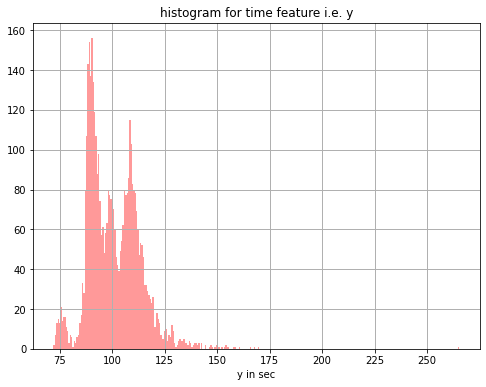

In [88]:
plt.figure(figsize=(8,6))
plt.title('histogram for time feature i.e. y')
sb.distplot(train_data.y, bins=300, kde=False,color='red')
plt.xlabel('y in sec')
plt.grid(linewidth=1,)

### Observation
1. Maximum y lies between 80 to 120
2. y is skewed

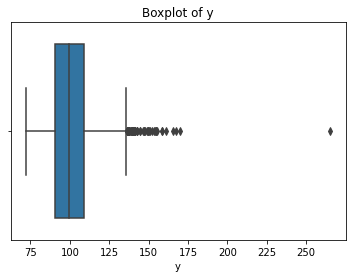

In [89]:
plt.title('Boxplot of y')
sb.boxplot(train_data.y)

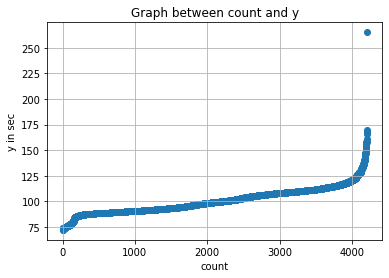

In [90]:
plt.title('Graph between count and y')# count =[1,2,3,4,............4209]
plt.scatter(range(len(train_data)),np.sort(train_data.y))
plt.xlabel('count')
plt.ylabel('y in sec')
plt.grid()

### Observation
1. There is one point which is far from other points.

### y feature description

In [91]:
train_data.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

pdf :  [3.82513661e-02 3.22404372e-01 2.48990259e-01 2.86053694e-01
 7.38892849e-02 1.90068900e-02 6.88999762e-03 2.85103350e-03
 1.18793062e-03 2.37586125e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.37586125e-04] 

bin edge :  [ 72.11        82.84388889  93.57777778 104.31166667 115.04555556
 125.77944444 136.51333333 147.24722222 157.98111111 168.715
 179.44888889 190.18277778 200.91666667 211.65055556 222.38444444
 233.11833333 243.85222222 254.58611111 265.32      ] 

outlier :  [0.038251366120218594, 0.36065573770491766, 0.6096459966737939, 0.8956996911380373, 0.9695889760038011, 0.9885958660014252, 0.995485863625564, 0.9983368971252077, 0.9995248277500592, 0.9997624138750295, 0.9997624138750295, 0.9997624138750295, 0.9997624138750295, 0.9997624138750295, 0.9997624138750295, 0.9997624138750295, 0.9997624138750295, 0.9999999999999998]


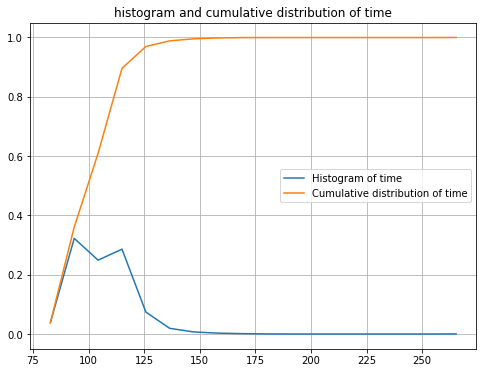

In [92]:
counts, bin_edges = np.histogram(train_data.y, bins=18,density = True)
pdf = counts/(sum(counts))
print('pdf : ',pdf,'\n');
print('bin edge : ',bin_edges,'\n')
cdf = np.cumsum(pdf)
plt.figure(figsize=(8,6))
plt.plot(bin_edges[1:],pdf,label='Histogram of time')
plt.plot(bin_edges[1:], cdf,label='Cumulative distribution of time')
plt.title('histogram and cumulative distribution of time')
plt.legend()
plt.grid()
c=0
q=[]
for i in pdf:
 c=c+i
 q.append(c)
print('outlier : ',q)

1. We can consider that y>150 be outlier.
2. Almost 99.83368% data cover before 150

#### Removing row y<150

In [0]:
train_data=train_data[train_data.y<150]

### Unique Feature for catagorical column

In [94]:
for j,i in enumerate(range(2,9)):
  print('Unique value in X'+str(j),' :')
  print(train_data.iloc[:,i].unique())
  print('No. of unique value : ',train_data.iloc[:,i].unique().shape[0],'\n')
print('Unique value in X8 :')
print(train_data.iloc[:,9].unique())
print('No. of unique value : ',train_data.iloc[:,9].unique().shape[0],'\n')

Unique value in X0  :
['k' 'az' 't' 'al' 'o' 'w' 'j' 'h' 's' 'n' 'ay' 'f' 'x' 'y' 'aj' 'ak' 'am'
 'z' 'q' 'at' 'ap' 'v' 'af' 'a' 'e' 'ai' 'd' 'aq' 'c' 'aa' 'ba' 'as' 'i'
 'r' 'b' 'ax' 'bc' 'u' 'ad' 'au' 'm' 'l' 'aw' 'ao' 'ac' 'g' 'ab']
No. of unique value :  47 

Unique value in X1  :
['v' 't' 'w' 'b' 'r' 'l' 's' 'aa' 'c' 'a' 'e' 'h' 'z' 'j' 'o' 'u' 'p' 'n'
 'i' 'y' 'd' 'f' 'm' 'k' 'g' 'q' 'ab']
No. of unique value :  27 

Unique value in X2  :
['at' 'av' 'n' 'e' 'as' 'aq' 'r' 'ai' 'ak' 'm' 'a' 'k' 'ae' 's' 'f' 'd'
 'ag' 'ay' 'ac' 'ap' 'g' 'i' 'aw' 'y' 'b' 'ao' 'al' 'h' 'x' 'au' 't' 'an'
 'z' 'ah' 'p' 'am' 'j' 'q' 'af' 'l' 'aa' 'c' 'o' 'ar']
No. of unique value :  44 

Unique value in X3  :
['a' 'e' 'c' 'f' 'd' 'b' 'g']
No. of unique value :  7 

Unique value in X4  :
['d' 'b' 'c' 'a']
No. of unique value :  4 

Unique value in X5  :
['u' 'y' 'x' 'h' 'g' 'f' 'j' 'i' 'd' 'c' 'af' 'ag' 'ab' 'ac' 'ad' 'ae'
 'ah' 'l' 'k' 'n' 'm' 'p' 'q' 's' 'r' 'v' 'w' 'o' 'aa']
No. of unique value :  29 


In [95]:
print('Time median : ',train_data.y.median(),' | Time mean : ',train_data.y.mean())

Time median :  99.09  | Time mean :  100.43993800667607


# **X0 feature preprocessing**

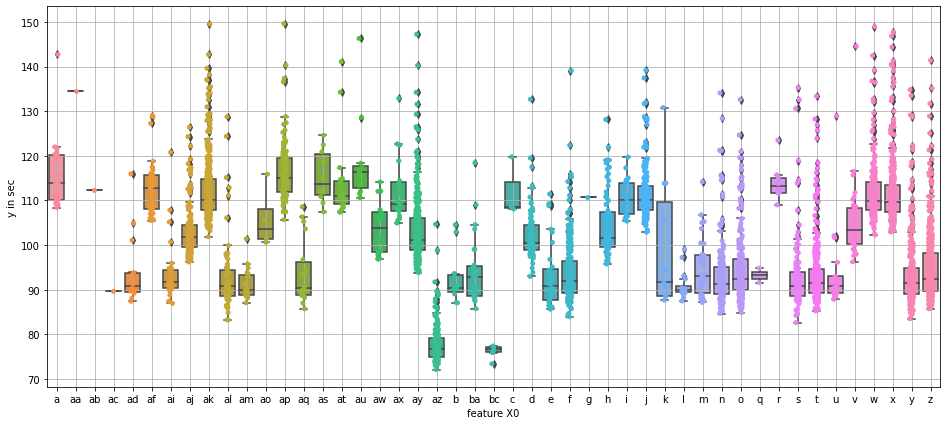

In [96]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X0', y='y', data=train_data, order=np.sort(train_data.X0.unique()).tolist())
sb.boxplot(x='X0', y='y', data=train_data, order=np.sort(train_data.X0.unique()).tolist())
plt.xlabel('feature X0')
plt.ylabel('y in sec')
plt.grid()

### Observation
This feature is well spread. It mean that all unique item’s lies in some specific range. e.g. all ‘a’ have time greater than 110 ,similarly ‘aa’ have time greater than 135,all ‘az’ time lie below 110 because of this we can guess or predict approx time easily. E.g. if my query point have ‘a’ then i don’t know the exact value but i know that will be more than 110 sec
### My approach
We can put each unique iteam into sets by looking median.


#### Train

In [0]:
def X0_pre(train):
  f1=[]
  f2=[]
  f3=[]
  for i in train.X0.unique():
    a=train_data[train.X0==i].y.median()
    b=train_data[train.X0==i].shape[0]
    if 107<=a :
        f1.append(i)
    if 97<=a and a<107:
        f2.append(i)
    if a<97:
        f3.append(i)
  f=[f1,f2,f3]
  d0={}
  c=0
  for i in f:
    for j in i:
      d0[j]=c
    c=c+1
  X0=[]
  for i in train.X0:
    X0.append(d0[i])
  return d0,X0

In [0]:
tr_df=pd.DataFrame(train_data.y,columns=['y'])

In [0]:
D,X=X0_pre(train_data)

In [0]:
tr_df['X0_n']=X

# **X2 feature preprocessing**

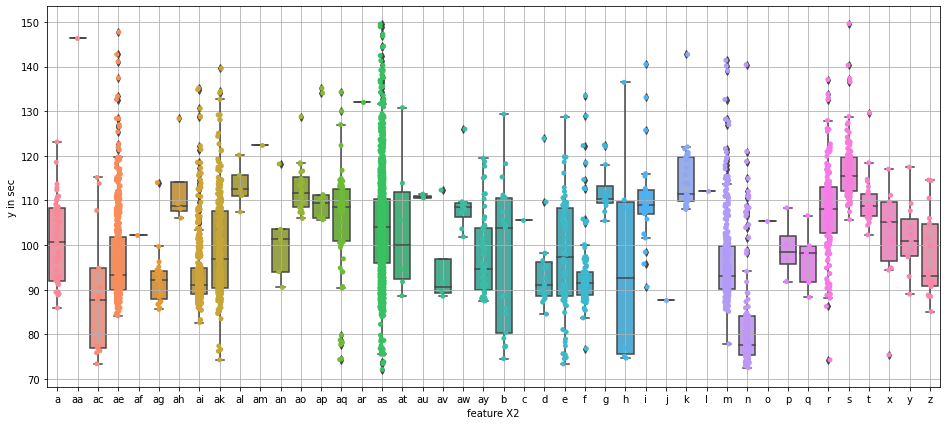

In [101]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X2', y='y', data=train_data, order=np.sort(train_data.X2.unique()).tolist())
sb.boxplot(x='X2', y='y', data=train_data, order=np.sort(train_data.X2.unique()).tolist())
plt.xlabel('feature X2')
plt.ylabel('y in sec')
plt.grid()

ak,as,ae are the unique value which do not have specific range of time and ak,as,ae cover 69% of total data

In [0]:
def X2_pre(train_data):
  f1=[]
  f2=[]
  f3=[]
  for i in train_data.X2.unique():
    a=train_data[train_data.X2==i].y.median()
    b=train_data[train_data.X2==i].shape[0]
    if 107<=a :
      f1.append(i)
    if 98<=a and a<107:
      f2.append(i)
    if a<98:
      f3.append(i)
  f=[f1,f2,f3]
  d2={}
  c=0
  for i in f:
    for j in i:
      d2[j]=c
    c=c+1
  X2=[]
  for i in train_data.X2:
    X2.append(d2[i])
  return d2,X2

In [0]:
D2,X2=X2_pre(train_data)

In [0]:
tr_df['X2_n']=X2

# **X3 feature**

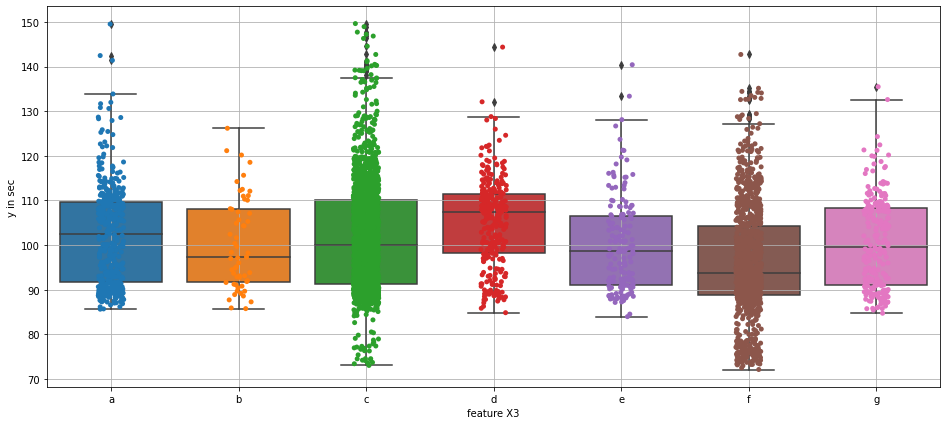

In [105]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X3', y='y', data=train_data, order=np.sort(train_data.X3.unique()).tolist())
sb.boxplot(x='X3', y='y', data=train_data, order=np.sort(train_data.X3.unique()).tolist())
plt.xlabel('feature X3')
plt.ylabel('y in sec')
plt.grid()

## X5 feature

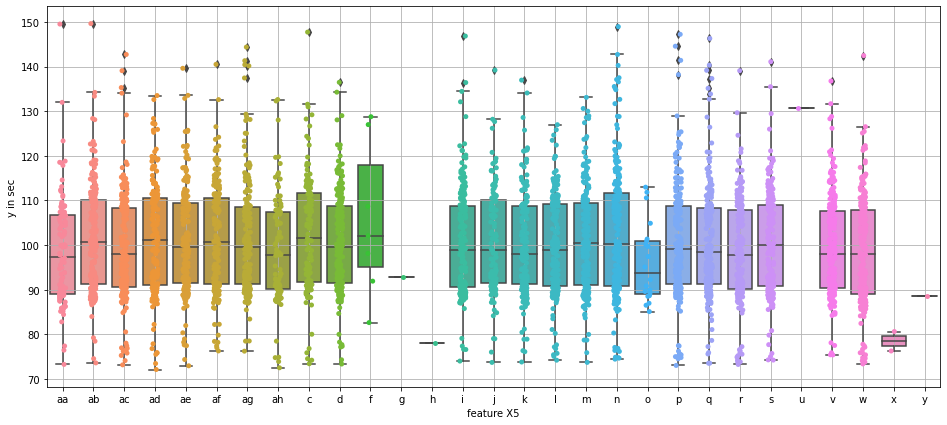

In [106]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X5', y='y', data=train_data, order=np.sort(train_data.X5.unique()).tolist())
sb.boxplot(x='X5', y='y', data=train_data, order=np.sort(train_data.X5.unique()).tolist())
plt.xlabel('feature X5')
plt.ylabel('y in sec')
plt.grid()

# **X6 feature**

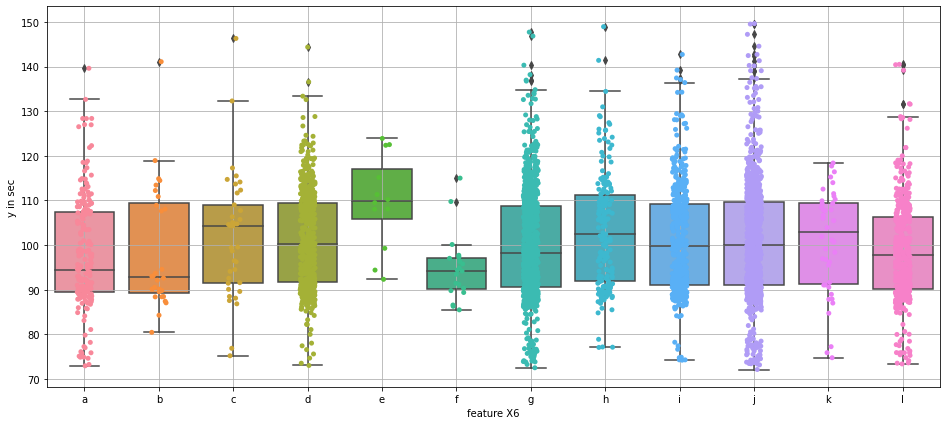

In [107]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X6', y='y', data=train_data, order=np.sort(train_data.X6.unique()).tolist())
sb.boxplot(x='X6', y='y', data=train_data, order=np.sort(train_data.X6.unique()).tolist())
plt.xlabel('feature X6')
plt.ylabel('y in sec')
plt.grid()

# **X8 feature**

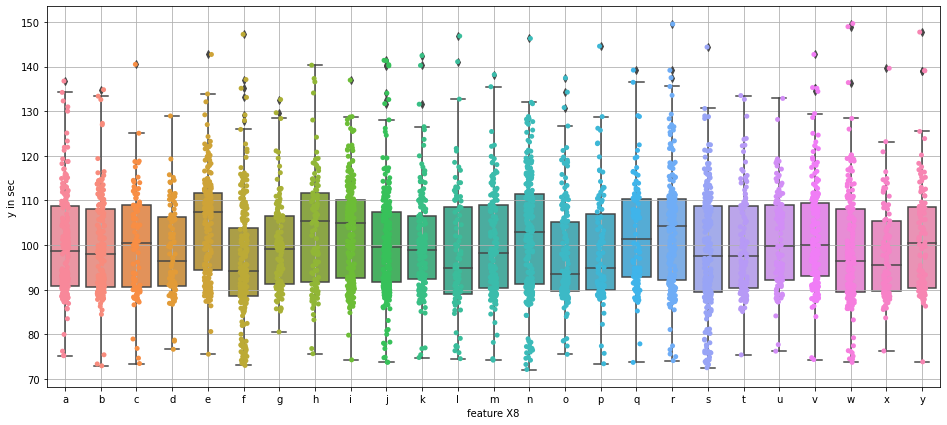

In [108]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X8', y='y', data=train_data, order=np.sort(train_data.X8.unique()).tolist())
sb.boxplot(x='X8', y='y', data=train_data, order=np.sort(train_data.X8.unique()).tolist())
plt.xlabel('feature X8')
plt.ylabel('y in sec')
plt.grid()

# **X1 feature**

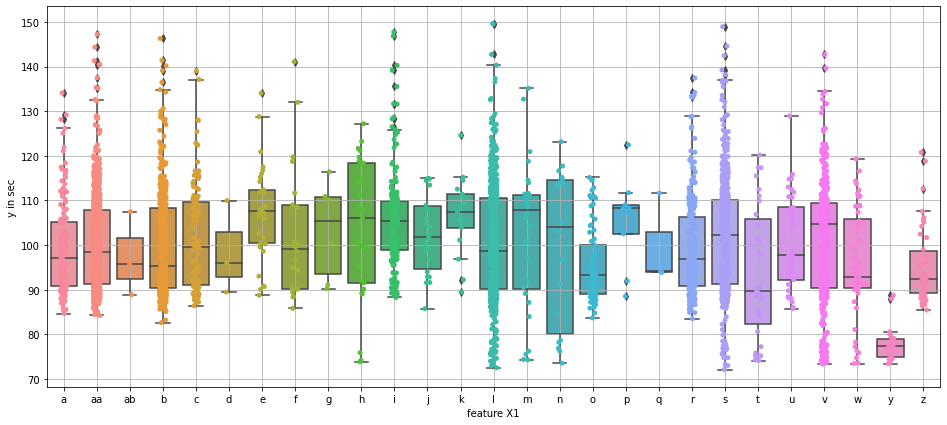

In [109]:
plt.figure(figsize=(16,7))
sb.stripplot(x='X1', y='y', data=train_data, order=np.sort(train_data.X1.unique()).tolist())
sb.boxplot(x='X1', y='y', data=train_data, order=np.sort(train_data.X1.unique()).tolist())
plt.xlabel('feature X1')
plt.ylabel('y in sec')
plt.grid()

1. The feature X3,X1,X5,X6,X8,X4 can not be converted into a different sets because the unique value does not lies into a specific range. It means there is no set pattern. For eg in plot X1 : 'b' value can lies from 83 to 140+ similarly 'c' value can lies from 86 to 138 that's why we put value into sets according to the value ranges.
2. The feature X3,X1,X5,X6,X8,X4,X2 are less informative as compare to X0

In [0]:
import joblib
from sklearn.preprocessing import LabelEncoder
for i in ['X0','X1','X2','X3','X4','X5','X6','X8']:
    lab = LabelEncoder()
    lab.fit(pd.concat([train_data[i],test_data[i]]))
    joblib.dump(lab,i)

In [0]:
for i in ['X0','X1','X2','X3','X4','X5','X6','X8']:
  pre_enc=joblib.load(i)
  tr_df[i]=pre_enc.transform(train_data[i])

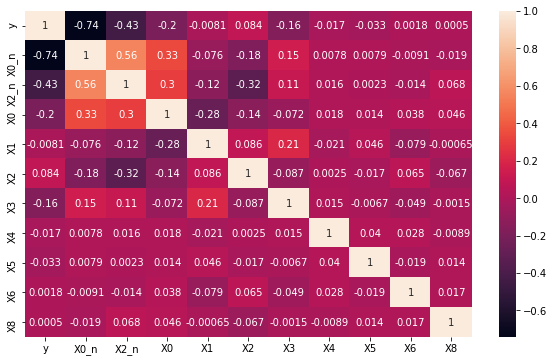

In [112]:
plt.figure(figsize=(10,6))
sb.heatmap(tr_df.corr(),annot=True)

# **Binary feature**

In [113]:
print('Total no. of binary feature : ',len(train_data.iloc[:,10:].columns.tolist()))

Total no. of binary feature :  368


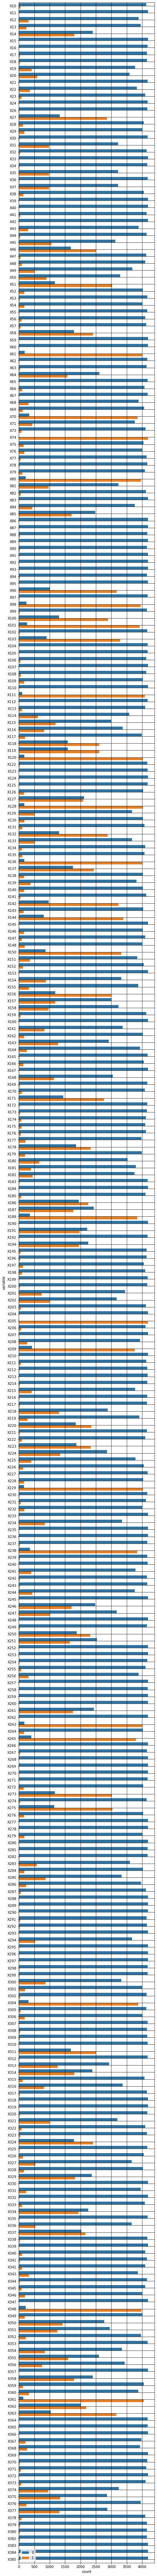

In [114]:
plt.figure(figsize=(7,136))
po=sb.countplot(y='variable',hue='value',data=pd.melt(train_data.iloc[:,10:]))
plt.savefig('/content/drive/My Drive/poo.png')
plt.grid(color='black')
plt.legend()

## Observation
1. Some of the feature have all zero value. So we can remove all those feature

### All unique feature from X10 to X378

In [0]:
def rem_zero(train):
  inn=[]
  out=[]
  for i in train.iloc[:,10:].columns:
    td=train[i].unique().tolist()
    if len(td)>=2:
      inn.append(i)
    else:
      out.append(i) 
  return inn,out

In [0]:
n,o=rem_zero(train_data)

In [117]:
print('The features contain only 0   : ',o,' : lenght : ',len(o),'\n')
print('The features contain only 0|1 : ',n, ' : lenght : ',len(n))

The features contain only 0   :  ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X339', 'X347']  : lenght :  13 

The features contain only 0|1 :  ['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X

#### Removing zero columns

In [0]:
bin_data=train_data.loc[:,n]

## **ID feature preprocessing**

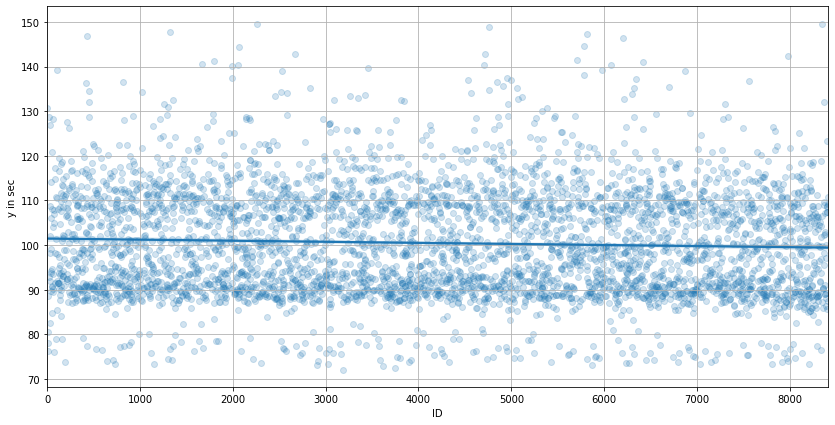

In [119]:
plt.figure(figsize=(14,7))
sb.regplot(x='ID', y='y', data=train_data,scatter_kws={'alpha':0.2})
plt.xlabel('ID')
plt.ylabel('y in sec')
plt.grid()

1. The linear fitting line(dark blue line) is going down as ID value increase. So we can give less weightage to new id. Which means ID 1st will get more weightage in compare to 10th ID.

In [0]:
def rec_id(train):
  ip=[]
  for i in train.ID:
    if i==0:
      ip.append(.35)
    else:
      ip.append(1/(np.log(i)+3))
  return ip

In [0]:
tr_df['ID']=rec_id(train_data)

In [0]:
data_tr=pd.concat([tr_df,bin_data],axis=1)

## **Clustering of X0**

In [0]:
from sklearn.cluster import KMeans

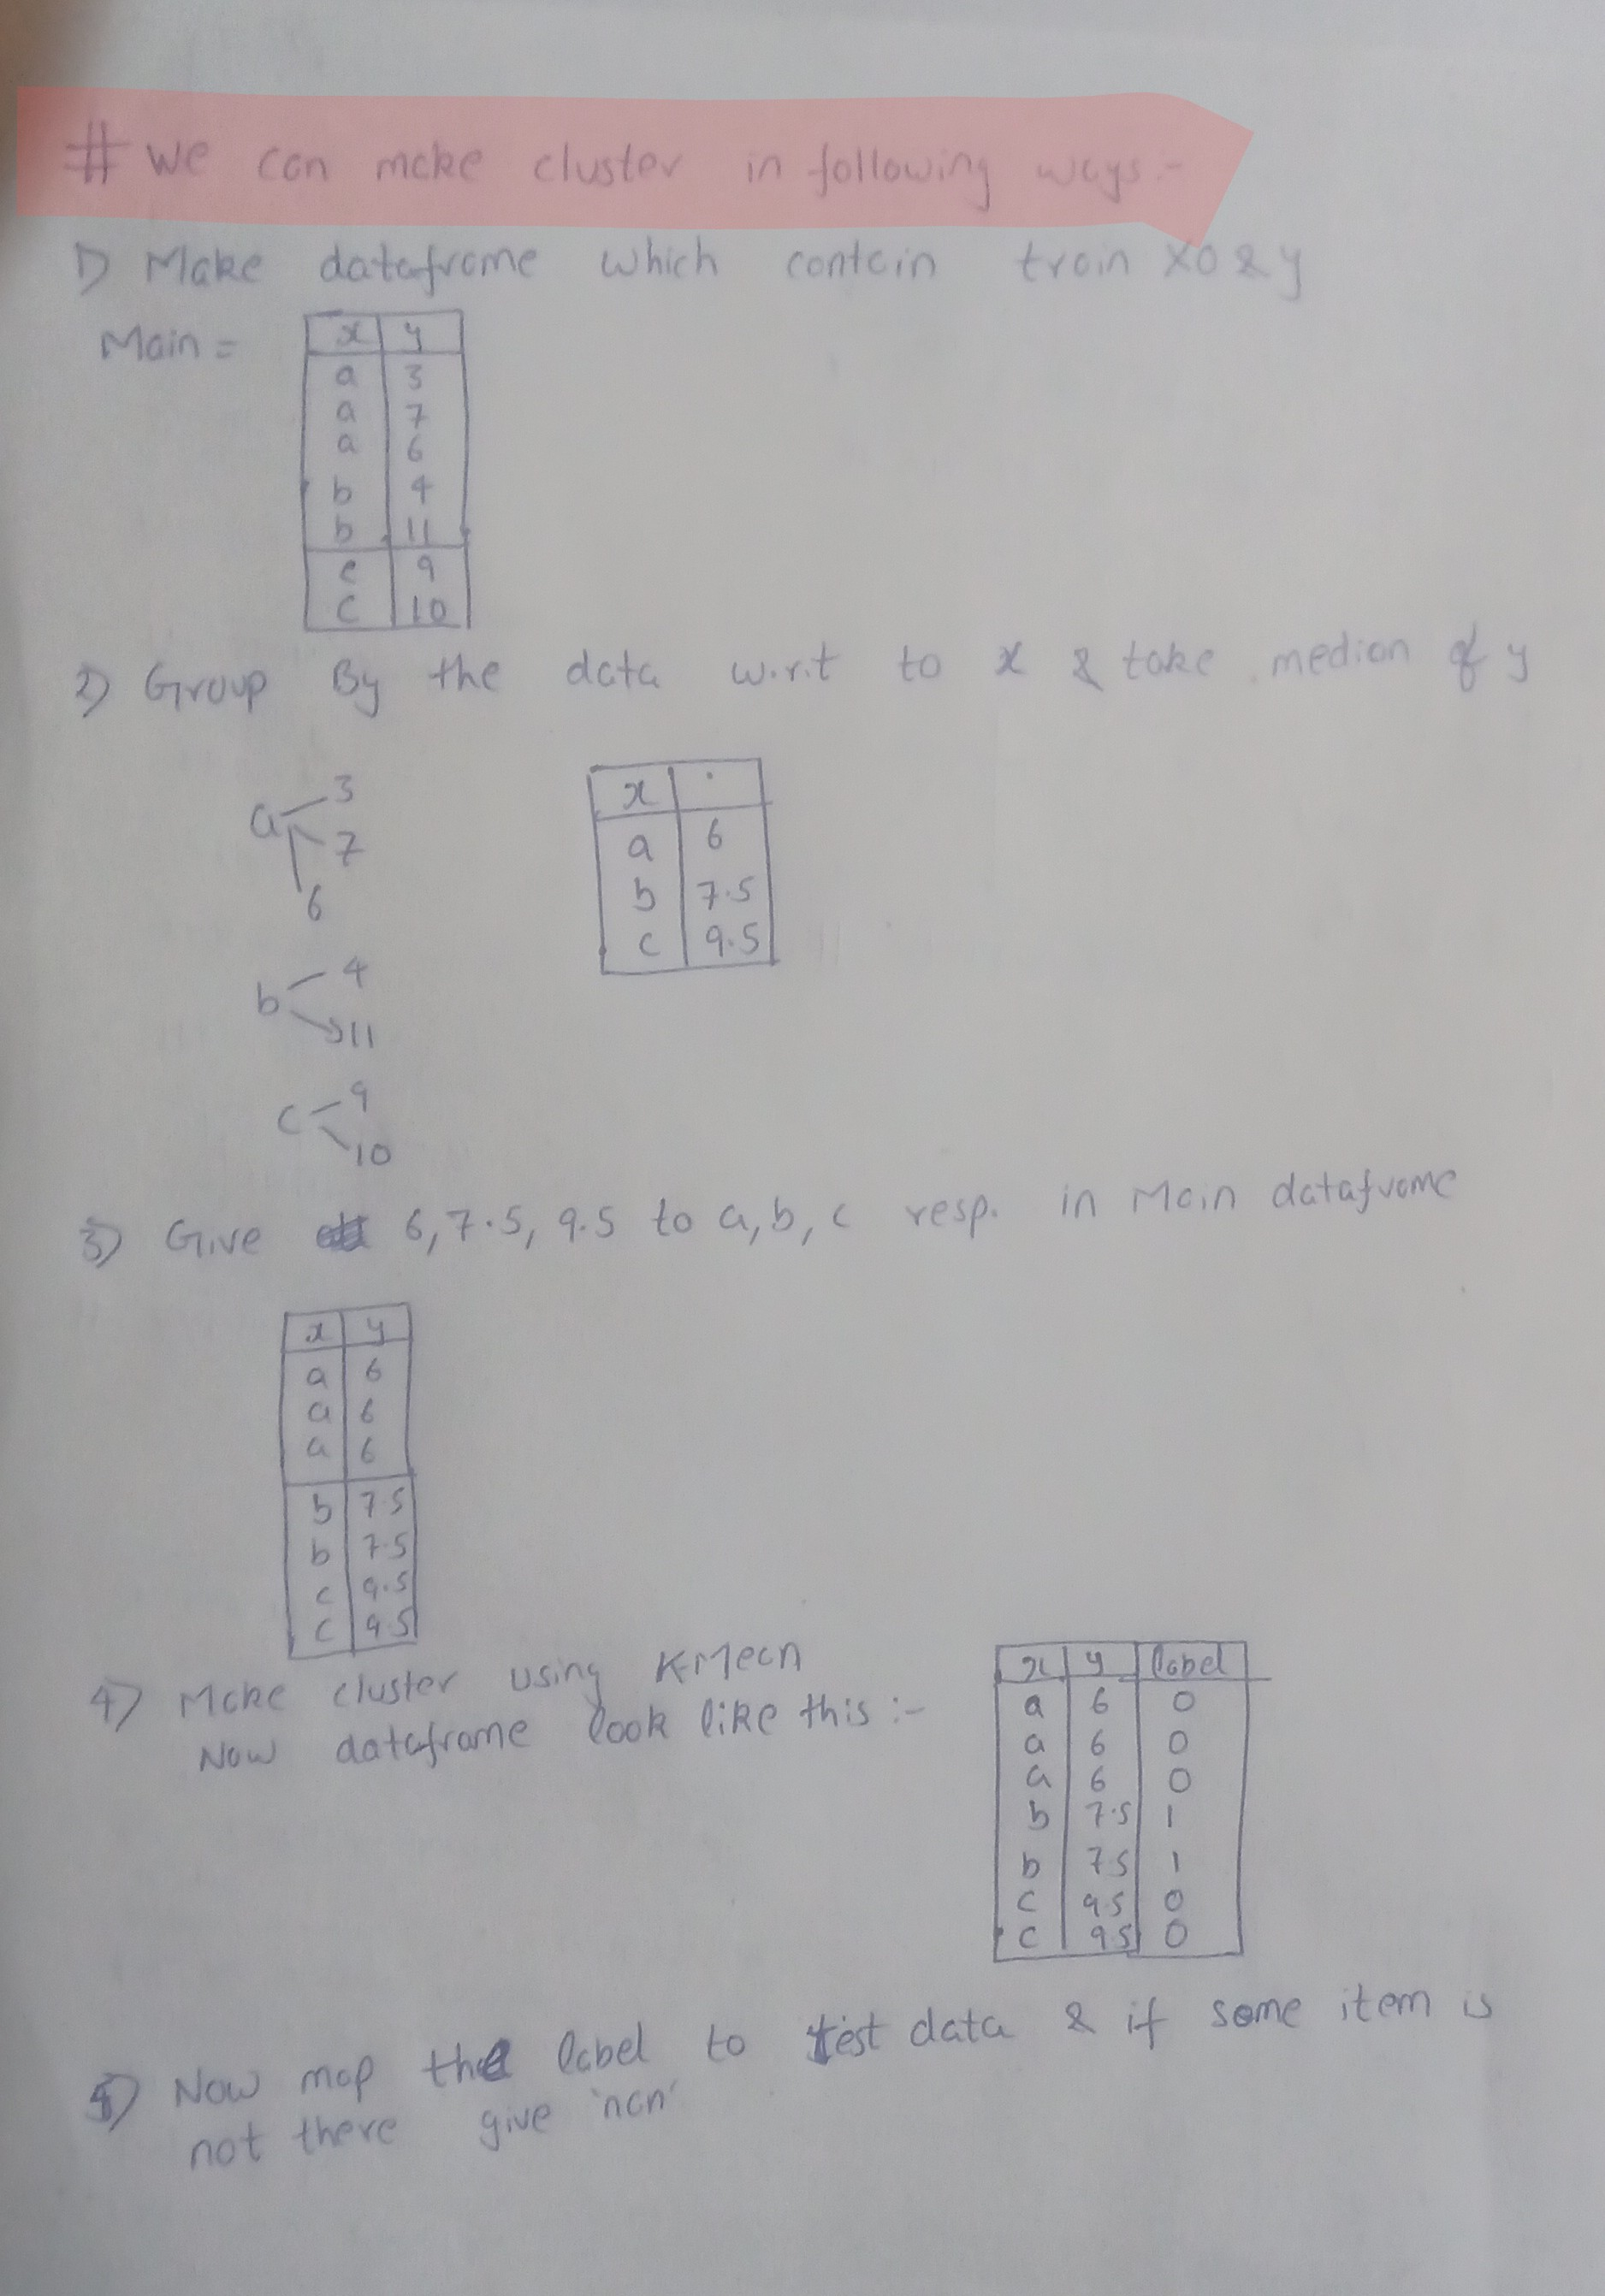

In [124]:
from IPython.display import Image
Image('/content/drive/My Drive/cluster.jpg',width=800,height=900)

In [0]:
def clust(data):
  pf=pd.DataFrame()
  pf['X']=data.X0
  pf['y']=data.y
  encod=data.groupby('X0')['y'].median()
  clust = KMeans(4,random_state=0)
  labels = clust.fit_predict(encod[data['X0'].values].values.reshape(-1,1))
  pf['label']=labels
  return pf

In [0]:
d=clust(train_data)

In [0]:
data_tr['X0_clus']=d.label

In [0]:
X=data_tr.drop('y',axis=1)
y=data_tr.y

In [0]:
import xgboost as xgb

[06:08:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
important feature by XGBoost


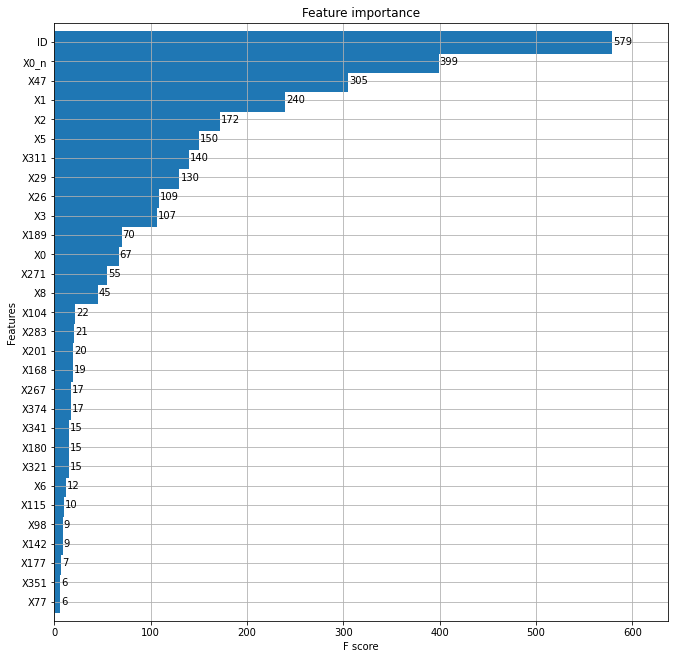

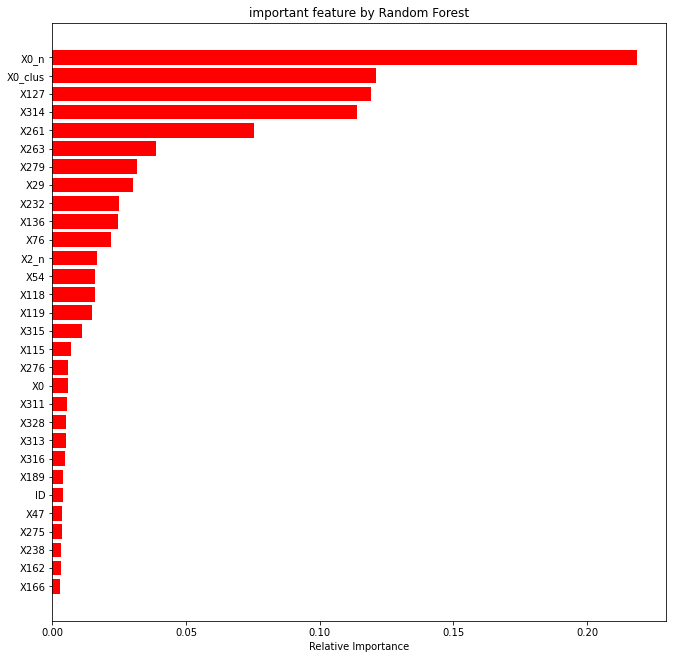

In [137]:
def r2_score(pre, final):
    l = dtrain.get_label()
    return 'r2', r2_score(l, pre)

params = {'n_trees': 550,'max_depth': 4, 'eta': 0.0045,'subsample': 0.98,'eval_metric': 'rmse','objective': 'reg:linear','base_score': np.mean(y)}

f = xgb.DMatrix(X, y, feature_names=X.columns.values)
model = xgb.train(dict(params), f, num_boost_round=200,)

fig, ax = plt.subplots(figsize=(11,11))
xgb.plot_importance(model, max_num_features=30, height=1.2, ax=ax)
print("important feature by XGBoost")

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, max_depth=5, max_features=0.2, min_samples_leaf=4, random_state=0)
model.fit(X, y)
features = X.columns
importances = model.feature_importances_
indices = (np.argsort(importances))[-30:]
plt.figure(figsize=(11,11))
plt.title('important feature by Random Forest')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Making new feature

In [0]:
data_tr['X118_plus_X314_plus_X315'] = data_tr.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)

In [0]:
data_tr['X314_plus_X315'] = data_tr.apply(lambda row: row.X314 + row.X315, axis=1)

In [0]:
X=data_tr.drop('y',axis=1)
y=data_tr.y

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [0]:
xgbr=XGBRegressor()
prams={
 'learning_rate':[.01,.04,.1],
 'n_estimators':[500,600,650,700,750,800],
 'colsample_bytree':[0.35,.55,0.65,0.75],
 'subsample':[0.35,.55,0.65,.75,0.85,95],
 'gamma':[.15,.65,.85,],
 'colsample_bylevel':[.45,.65,.75,.85,.95]
 }
gsv=GridSearchCV(xgbr,prams,scoring='r2',cv=8)
#gsv.fit(X, y)

In [0]:
#print(tp.best_params_)

## Training the model

In [62]:
xg=XGBRegressor(learning_rate=.01,max_depth=3,n_estimators=600,colsample_bytree=.55,subsample=.85,gamma=.65,colsample_bylevel=.95)
xg.fit(X,y)

[04:28:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.95,
             colsample_bynode=1, colsample_bytree=0.55, gamma=0.65,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.85, verbosity=1)

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [148]:
rf=RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=4, max_features=0.2)
rf.fit(X,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=0.2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [149]:
joblib.dump(rf,'model1')
joblib.dump(xg,'model2')

['model']

In [0]:
def final(test):
  df_test=pd.DataFrame()
  d0,X0=X0_pre(train_data)
  uni=list(d0.keys())
  X_0=[]
  for i in test_data.X0:
    if i in uni:
      X_0.append(d0[i])
    else:
      X_0.append(0)
  df_test['X0_n']=X_0
  #
  d2,X2=X2_pre(train_data)
  uni=list(d2.keys())
  X_2=[]
  for i in test_data.X2:
    if i in uni:
      X_2.append(d2[i])
    else:
      X_2.append(0)
  df_test['X2_n']=X_2
  #label encoding
  for i in ['X0','X1','X2','X3','X4','X5','X6','X8']:
    pre_te_enc=joblib.load(i)
    df_test[i]=pre_te_enc.transform(test[i])
  #binary
  n,o=rem_zero(train_data)
  bin_df=test.loc[:,n]
  #ID
  df_test['ID']=rec_id(test)
  data_te=pd.concat([df_test,bin_df],axis=1)
  #cluster
  dc=clust(train_data)
  data_te['X0_clus']=test['X0'].map(dc.groupby('X')['label'].median())
  #adding 
  data_te['X118_plus_X314_plus_X315'] = data_te.apply(lambda row: row.X118 + row.X314 + row.X315, axis=1)
  data_te['X314_plus_X315'] = data_te.apply(lambda row: row.X314 + row.X315, axis=1)
  data_te['X0_clus'].fillna(1,inplace=True)
  #prediction
  xgb=joblib.load('model')
  pre=(xgb.predict(data_te)+.4)
  return pre
pred=final(test_data)

In [0]:
final=pd.DataFrame()
final['ID']=test_data.ID
final['y']=pred

#### Final y_pred

In [0]:
#final

## kaggle leaderboard
1. private 0.55329
2. public  0.55621

## I got 41th rank (private leaderboard)

## reference
1. https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/37700
2. https://www.kaggle.com/c/mercedes-benz-greener-manufacturing/discussion/36242
3. https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-mercedes